**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- McKayla David
- Sebastian Modafferi
- Anna Potapenko
- Matthew Chan
- Kirthin Rajkumar


# Research Question

On a global economic scale, do larger (on the basis of funding and quantity of employees) companies lay off a higher percentage of employees than smaller companies? What indicators specifically can be used to predict the percentage of employees laid off?


## Background and Prior Work

Layoffs refer to economic and organizational changes, and are a significant indicator of the success and development of companies. While they affect employees, layoff rates have a broader implication on the health of the economy, industry trends, and the state of the workforce. Understanding the trends and impacts of layoffs is vital not only on a global economic scale, but within communities of stakeholders and individual communities.

Layoffs are important to study due to their relevance to both companies and employees. For a company, understanding indicators which can predict imminent layoffs can help them course correct before reaching a point of no return. On the other hand, employees understanding layoff indicators can help them in choosing the correct company for their next role, ensuring job safety. 

Research published in the Journal of the European Economic Association [1^](#https://academic.oup.com/jeea/article-abstract/18/1/427/5247011) explored the economic influences that cause layoffs, and inquired into how financial health and market factors influence layoff decisions. A similar study published in Journal of Labor Economics looks into the effects of layoffs on unemployment rates, and found that layoffs can have lasting impact on the job market and employee career trajectory.

The journal of Labor Empirical Finance [3^](#https://doi.org/10.1016/s0927-5398\(01\)00024-x) also looks into the different firms and what caused their layoffs, giving insight into company restructuring and different technologies that help to modify the workforce requirements. Additionally, past precedent reviewed by JSTOR [2^](#https://www.jstor.org/stable/117002?casa_token=m7s1bFw7mY4AAAAA%3AhaYXwJWsj5E0Xo7vbnjns6omvUnSFYlenLVZ99nBhONKkQRCLyfLIdEk3ZJycob9If4HtLaMga7y7cQzrzAO6QfJYXTkccHfVciVYhTXREH7HSHuGN4) article explains the repetition of layoffs and how it correlates with economic cycles. This suggests that layoffs are an essential part of economic growth.

Research on layoffs adopts an interdisciplinary approach, using economic theories, organizational behavior, and societal impacts. Overall, it is imperative to understand the factors that influence layoffs because knowledge about these factors can help researchers develop strategies to mitigate the negative effects of layoffs on employees and the economy at large. Existing work does not provide internal indicators for when a company is about to execute layoffs, so our research seeks to identify a correlation between company size and layoffs.

1. <a name="Journal of the European Economic Association"></a> [^](#https://academic.oup.com/jeea/article-abstract/18/1/427/5247011) Gathmann, C., Helm, I., & Schönberg, U. (2018). Spillover effects of mass layoffs. Journal of the European Economic Association, 18(1), 427–468. https://doi.org/10.1093/jeea/jvy045
2. <a name="JSTOR"></a> [^](#cite_ref-2) Hallock, Kevin, (1998). Layoffs, top executive pay, and firm performance on JSTOR. (n.d.). www.jstor.org. https://www.jstor.org/stable/117002
3. <a name="Journal of Empirical Finance"></a> [^](#https://doi.org/10.1016/s0927-5398\(01\)00024-x) Chen, P., Mehrotra, V., Sivakumar, R., & Yu, W. (2001). Layoffs, shareholders’ wealth, and corporate performance. Journal of Empirical Finance, 8(2), 171–199. https://doi.org/10.1016/s0927-5398(01)00024-x


# Hypothesis


We hypothesize that larger companies lay off a higher percentage of employees, especially amidst a recession, than smaller companies. We are inclined to believe this due to the fact that smaller companies already have less employees, so lay-offs are more likely to harm the business than benefit it. Additionally, larger companies are able to withstand more financial pressure, allowing them to perform large layoffs despite the impact on company performance given that they have enough capital with withstand the losses.

# Data

## Data overview

For each dataset include the following information
- Dataset #1 - Kaggle
  - Dataset Name: "Tech Layoffs 2020-2024"
  - https://www.kaggle.com/datasets/ulrikeherold/tech-layoffs-2020-2024
  - Number of observations: 1418
  - Number of variables: 16

This dataset was webscraped from layoffs.fyi. It contains layoff data over the past 4 years which was webscraped from news articles. The key data variables we will be using are `Money_Raised_in_$_mil`, `Percentage`, `Laid_Off`, `Funding`, and `Stage`. We are focusing analysis on these columns because they contain vital information about layoffs and how the company is performing. It comes fairly clean, and the only correction required is the `Money_Raised_in_$_mil` column, as it initally was stored as a string containing a dollar sign character.

## Layoffs.fyi Dataset

We begin our data analysis by loading in the data, and cleaning the data to best suit our exploratory needs.

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import patsy
import statsmodels.api as sm
import warnings
import scipy.stats as stats
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import ttest_ind, chisquare, normaltest
from statsmodels.formula.api import ols
from collections import defaultdict


In [2]:
df = pd.read_excel('./data/tech_layoffs.xlsx')
df.head()

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200,2023-12-20,15.0,1333,1133,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100,2023-12-19,20.0,500,400,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350,2023-12-18,10.0,3500,3150,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100,2023-12-18,10.0,1000,900,Retail,Unknown,1500,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900,2023-12-14,24.0,3750,2850,Transportation,Acquired,$15000,2023,37.77493,-122.41942


In [3]:
#remove company name
df = df.drop(columns=['Company'])

In [4]:
df['Funding'] = df['Money_Raised_in_$_mil'].apply(lambda s: np.float64(s[1:])) 
df['Money_Raised_in_$_mil'] = df['Money_Raised_in_$_mil'].apply(lambda s: np.float64(s[1:])) 
df['Funding'].head()

0     1700.0
1      733.0
2      116.0
3      500.0
4    15000.0
Name: Funding, dtype: float64

In [5]:
df.head()

,#,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng,Funding
0,3,Bengaluru,India,Asia,200,2023-12-20,15.0,1333,1133,Consumer,Series H,1700.0,2023,12.97194,77.59369,1700.0
1,4,Haifa,Israel,Asia,100,2023-12-19,20.0,500,400,Healthcare,Unknown,733.0,2023,32.81841,34.98850,733.0
2,6,San Francisco Bay Area,USA,North America,350,2023-12-18,10.0,3500,3150,Energy,Post-IPO,116.0,2023,37.54827,-121.98857,116.0
3,7,Bengaluru,India,Asia,100,2023-12-18,10.0,1000,900,Retail,Unknown,500.0,2023,12.97194,77.59369,500.0
4,14,San Francisco Bay Area,USA,North America,900,2023-12-14,24.0,3750,2850,Transportation,Acquired,15000.0,2023,37.77493,-122.41942,15000.0


In [6]:
df.dtypes

#                                       int64
Location_HQ                            object
Country                                object
Continent                              object
Laid_Off                                int64
Date_layoffs                   datetime64[ns]
Percentage                            float64
Company_Size_before_Layoffs             int64
Company_Size_after_layoffs              int64
Industry                               object
Stage                                  object
Money_Raised_in_$_mil                 float64
Year                                    int64
lat                                   float64
lng                                   float64
Funding                               float64
dtype: object

In [7]:
def check_null_values(df):
    null_values = df.isnull().sum().sum()
    if null_values == 0:
        print("No, null values do not exist")
    else:
        print("Yes, null values exist")
check_null_values(df)

No, null values do not exist


# Results

### Analyzing Geographic Bias

Our data comes with latitude and longitude values, so let's look into some geographic analysis. With a geographic plot we can see _where_ our data is coming from. This will give us insight into any bias introduced to our data, since we can only analyze the countries we have data from. Additionally, it can give some insight into which countries lay off a higher percentage of their employees.

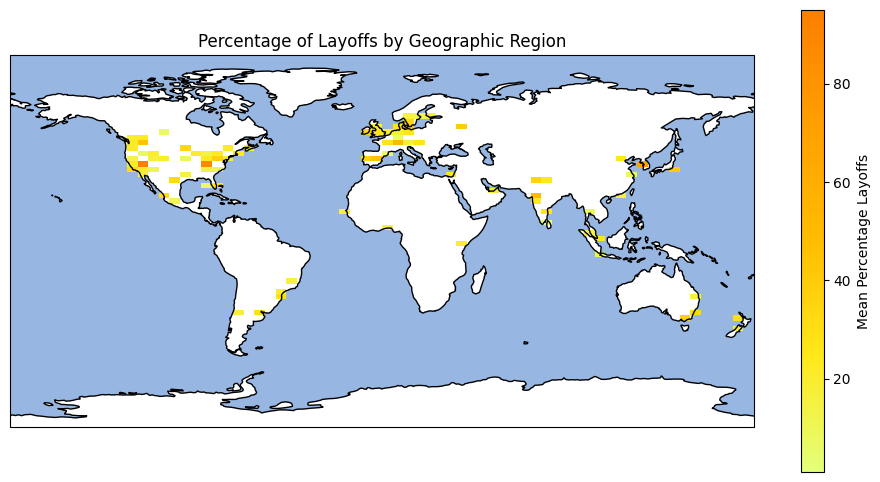

In [8]:
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.set_global()

num_bins = 70
lat_bins = np.linspace(-90, 90, num_bins + 1)
lng_bins = np.linspace(-180, 180, num_bins + 1)

lat_indices = np.digitize(df['lat'], lat_bins) - 1 
lng_indices = np.digitize(df['lng'], lng_bins) - 1

percentage_means = np.zeros((num_bins, num_bins))

for i in range(num_bins):
    for j in range(num_bins):
        in_bin = (lat_indices == i) & (lng_indices == j)
        if np.any(in_bin):
            percentage_means[i, j] = df['Percentage'][in_bin].mean()

percentage_means_masked = np.ma.masked_where(percentage_means == 0, percentage_means)

pcm = ax.pcolormesh(lng_bins, lat_bins, percentage_means_masked, cmap='Wistia', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
plt.colorbar(pcm, ax=ax, label='Mean Percentage Layoffs')
plt.title('Percentage of Layoffs by Geographic Region')
plt.show()

<Figure size 1600x600 with 0 Axes>

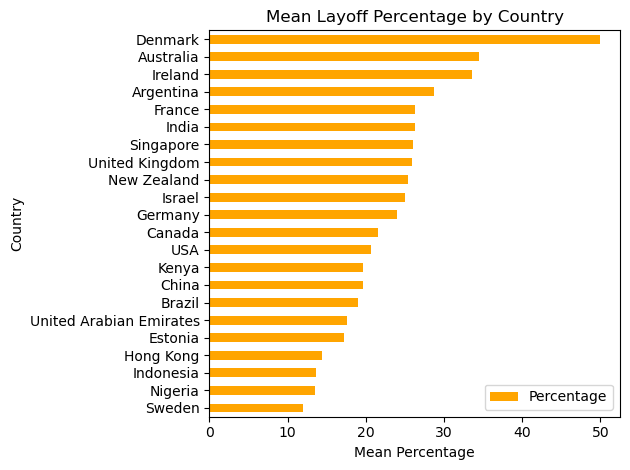

In [43]:
country_counts = df['Country'].value_counts()
three_observations = df[df['Country'].apply(lambda country: country_counts[country] >= 3)]
by_country = three_observations[['Country', 'Percentage']].groupby('Country').mean().sort_values(by='Percentage', ascending=True)
plt.figure(figsize=(16, 6))
by_country.plot(kind='barh', color='orange')

plt.xlabel('Mean Percentage')
plt.title('Mean Layoff Percentage by Country')
plt.tight_layout()
plt.show()

<Axes: ylabel='Location_HQ'>

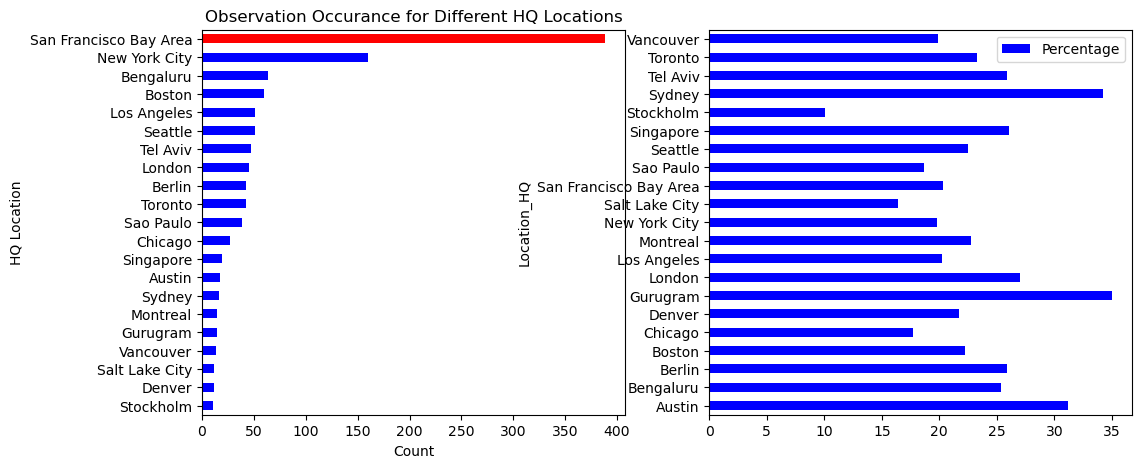

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
hq_counts = df['Location_HQ'].value_counts()
hq_counts = hq_counts[hq_counts.apply(lambda i: i > 10)].sort_values()
colors = list(map(lambda a: 'red' if a == 'San Francisco Bay Area' else 'blue', hq_counts.index))
hq_counts.plot(kind='barh', color=colors, ax=axes[0])
axes[0].set_xlabel('Count')
axes[0].set_ylabel('HQ Location')
axes[0].set_title('Observation Occurance for Different HQ Locations')
percentage_counts = df[['Percentage', 'Location_HQ']].groupby('Location_HQ').mean()
same_indexer = [loc in hq_counts.index for loc in percentage_counts.index]
percentage_counts[same_indexer].plot(kind='barh', color=colors, ax=axes[1])

In [56]:
map?

Init signature: map(self, /, *args, **kwargs)
Docstring:     
map(func, *iterables) --> map object

Make an iterator that computes the function using arguments from
each of the iterables.  Stops when the shortest iterable is exhausted.
Type:           type
Subclasses:     

Looking at this, it is pretty clear that data from the Bay Area is the most occurent in our dataset. Let's perform a bootstrap test to see if there are significant differences in our data that are not caused by sampling. A bootstrap is a process where we resample the data to see if the observed difference in our target variable, mean percentage of employees laid off, is observed due to chance, or observed due to a true difference in our data. Bootstrapping is effective at determining if the bay area is biasing our data since it does not require the data to have a specific distribution. This allows us to perform an analysis and understand the impact of this potential bias. This bootstrap will be a two-tailed test, which means we are looking to analyze if there is any difference between the two groups. The reason we are doing this instead of looking for a difference in a specific direction is because we are looking for bias in general, and it does not matter if the bias is influencing the mean to be lower or higher. Our alpha value for this p-test will be 0.05. This was chosen as it is a commonly accepted p-value, and we are willing to be more generous with the possible identification of bias, as opposed to using a p-value such as 0.01.

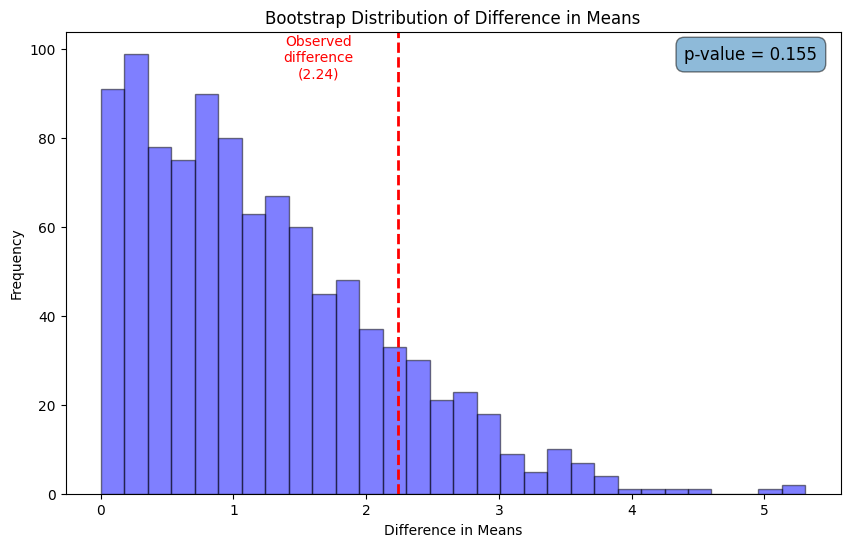

In [11]:
bay = df.copy()
bay['bay'] = df['Location_HQ'].apply(lambda hq: hq == 'San Francisco Bay Area')
in_bay = bay[bay['bay']]
out_bay = bay[bay['bay'] == False]
from scipy.stats import ttest_ind
from sklearn.utils import resample

inside_bay = bay[bay['bay'] == True]['Percentage']
outside_bay = bay[bay['bay'] == False]['Percentage']
observed_diff = np.abs(inside_bay.mean() - outside_bay.mean())

n_iterations = 1000
n_size = int(len(bay) * 0.50)
diff_means = np.zeros(n_iterations)

for i in range(n_iterations):
    sample = resample(bay['Percentage'], n_samples=n_size)
    inside_bay_sample = sample[:int(n_size / 2)]
    outside_bay_sample = sample[int(n_size / 2):]
    diff_means[i] = np.abs(inside_bay_sample.mean() - outside_bay_sample.mean())

p_value = np.sum(diff_means >= observed_diff) / n_iterations

plt.figure(figsize=(10, 6))
plt.hist(diff_means, bins=30, alpha=0.5, color='blue', edgecolor='black')

plt.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2)

plt.text(observed_diff - 0.6, plt.ylim()[1] * 0.9, f'Observed\ndifference\n({observed_diff:.2f})',
         horizontalalignment='center', color='red')
plt.text(0.97, 0.97, f'p-value = {p_value:.3f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle="round,pad=0.5", alpha=0.5))
plt.title('Bootstrap Distribution of Difference in Means')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.show()

With a p-value of 0.144, we are able to conclude that there is not sufficient evidence for difference in percetange of employees laid off given the company being based in the bay area or not. This suggests that our data containing a large majority of observations from one location is not a bias when it comes to observing the percentage of employees laid off.

## Industry trends

In this section, we examine layoff rates across different industries and years to identify potential patterns that may suggest industry-specific trends in workforce reductions. Recognizing that industries naturally vary in company size — with differences, for example, between expansive corporate chains and private research organizations — our goal is to illuminate whether layoffs are more significantly influenced by the size of the company or by the industry to which it belongs. This investigation will help determine the relative impact of industry characteristics versus company scale on layoff occurrences.

### Layoffs by industry

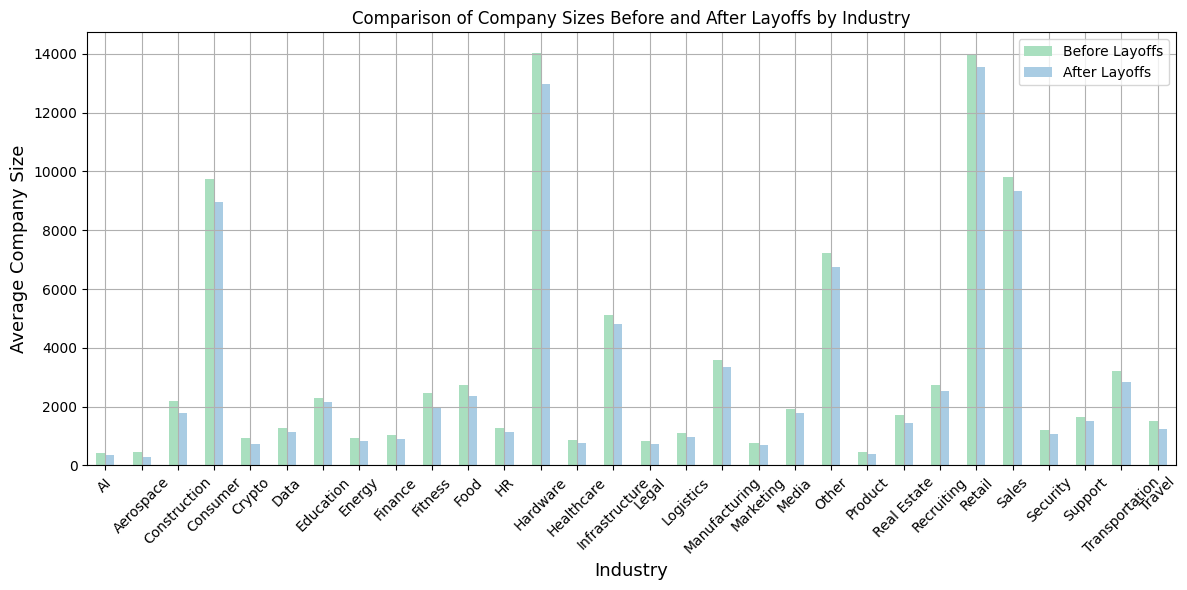

In [12]:

# company size before/after layoffs by industry
industry_sizes = df.groupby('Industry').agg({
    'Company_Size_before_Layoffs': 'mean',
    'Company_Size_after_layoffs': 'mean'
})

#plot
industry_sizes.plot(kind = 'bar', figsize = (12, 6), color  = ['#A9DFBF', '#A9CCE3'])
plt.title('Comparison of Company Sizes Before and After Layoffs by Industry')
plt.xlabel('Industry', fontsize = 13)
plt.ylabel('Average Company Size', fontsize = 13)
plt.xticks(rotation = 45)
plt.legend(['Before Layoffs', 'After Layoffs'])
plt.grid(True)
plt.tight_layout()

This graph illustrates the average size of companies within an industry, and their relative size after total layoffs for this dataset. We can see that the hardware and retail industries have both of the largest company sizes in this data, with hardware having the largest decrease in size after layoffs. With this in mind, we can further investigate if certain industries are more prone to layoffs than others.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1448\3306485119.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', num_bars)


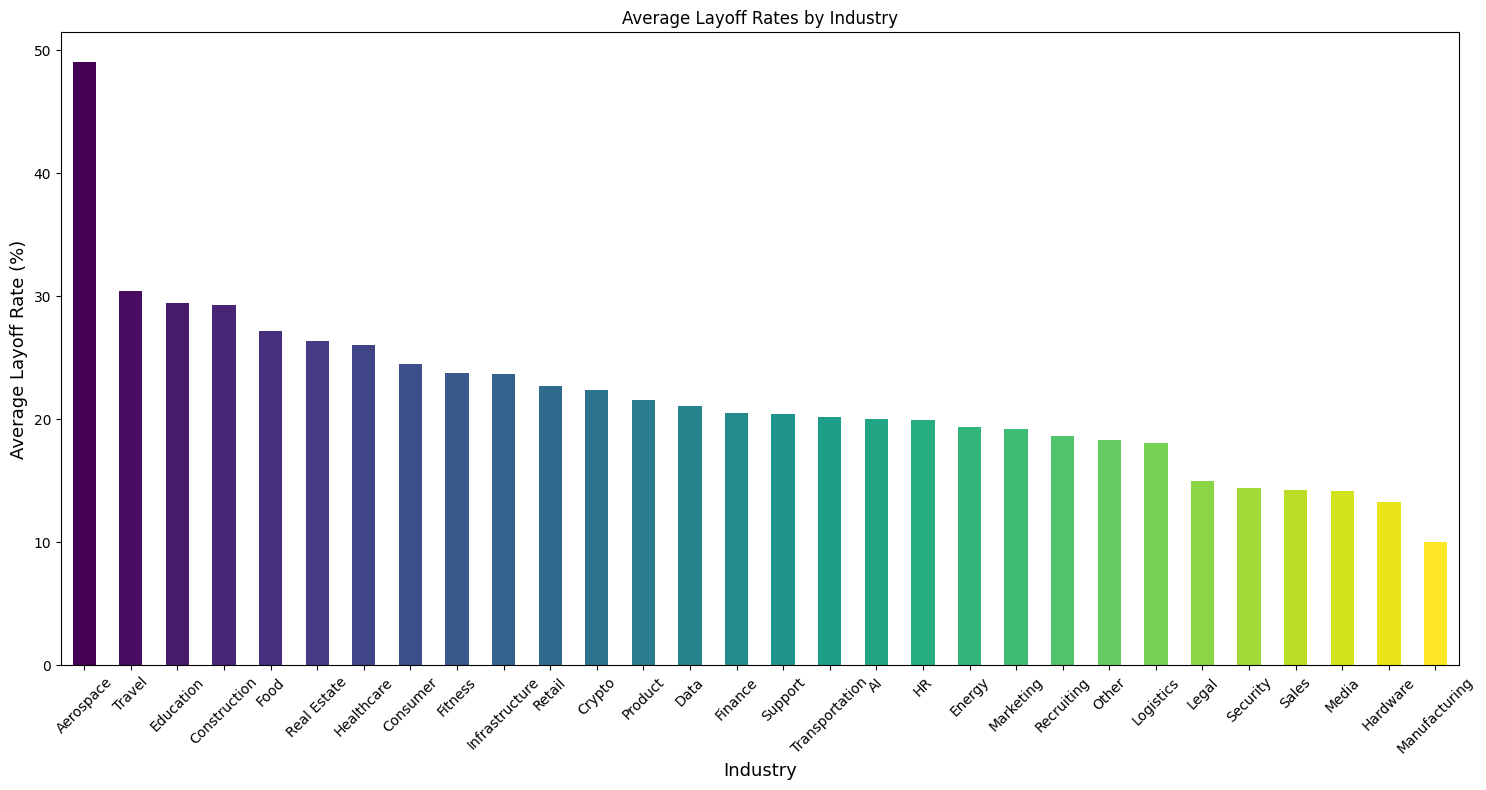

In [13]:
#group by industry percentage
industry_layoff_rates = df.groupby('Industry')['Percentage'].mean().sort_values(ascending=False)

#plot for rates
num_bars = len(industry_layoff_rates)
colors = plt.cm.get_cmap('viridis', num_bars)

plt.figure(figsize=(15, 8))
industry_layoff_rates.plot(kind='bar', color=[colors(i) for i in range(num_bars)])
plt.title('Average Layoff Rates by Industry')
plt.xlabel('Industry', fontsize = 13)
plt.ylabel('Average Layoff Rate (%)', fontsize = 13)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This barchart illustrates the average layoff rate across industries, with aerospace having the largest mean, and by a significant amount. While we previously saw the hardware industry with the largest difference in company size after layoffs, it is one of the lowest values for layoff rates. Additionally, when cross referencing this data with the previous graph, we can see that aerospace, while having the highest mean layofff rate, is of small to average company size. This suggests a relationship between industry and layoff rates. To further gain insight into these findings, let's continue to explore the data.

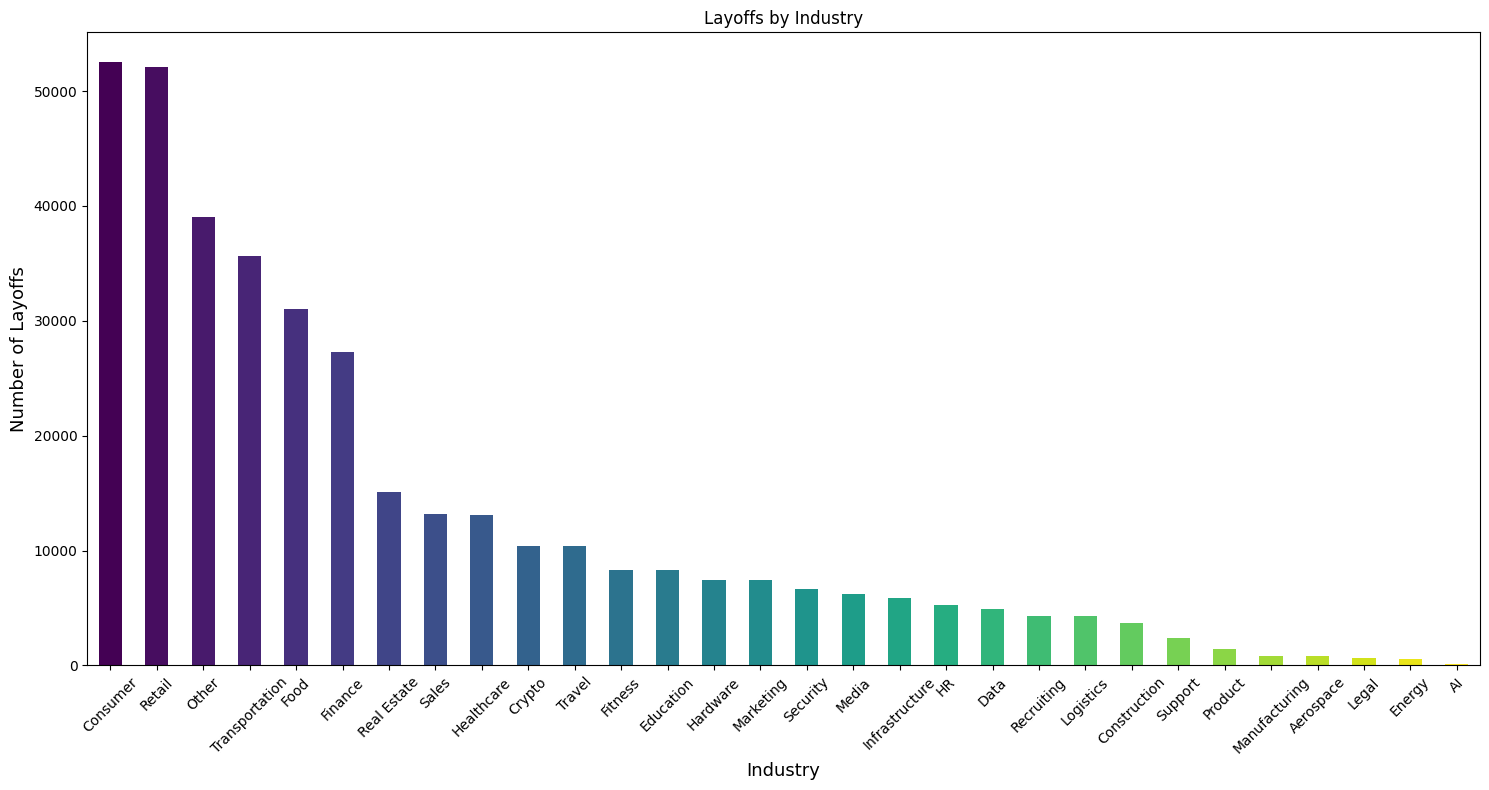

In [14]:
#group data by industry, sum laid-off values
industry_layoffs = df.groupby('Industry')['Laid_Off'].sum().sort_values(ascending=False)

#plot for sum of layoffs
plt.figure(figsize=(15, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(industry_layoffs)))
industry_layoffs.plot(kind='bar', color=colors)
plt.title('Layoffs by Industry')
plt.xlabel('Industry', fontsize = 13)
plt.ylabel('Number of Layoffs', fontsize = 13)
plt.xticks(rotation=45)
plt.tight_layout()

This visual facilitates the total sum of layoffs performed by industries. When compared to the previous graph on mean layoff rates, we can see that an industry can have a smaller total of employees laid off while simultaneously exhibiting a higher rate of layoffs. From these visualizations alone, we can speculate that industry might not be as relevant to predicting layoffs than company size. To investigate our hypothesis further, we proceed to performing statistical analysis on this topic to find statistical significance.

### ANOVA on layoff rates by industry

In order to further investigate any correlation between layoff rates and industry, an ANOVA was conducted between the Laid_Off and Industry columns. This test resulted in a low p-value, which suggests that there is a statistically significant difference in layoff rates across different industries. However, this does not account for relative company size to lay-off rates, which we will explore later on, in the funding section.

In [15]:
# ANOVA on layoff rates by industry
time_series_df = df.dropna(subset=['Year', 'Laid_Off'])

time_series_df = time_series_df.dropna(subset=['Laid_Off'])

model = ols('Laid_Off ~ C(Industry)', data=time_series_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                   sum_sq      df         F    PR(>F)
C(Industry)  5.018778e+07    29.0  2.307856  0.000105
Residual     1.040832e+09  1388.0       NaN       NaN


## Relationship Between Company Size Before Layoffs and Percentage of Employees Laid Off



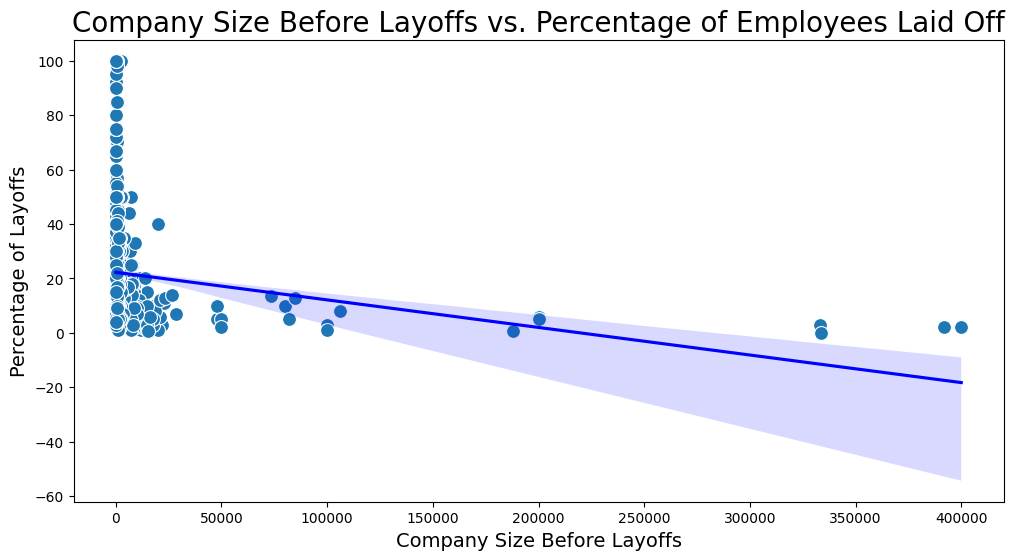

In [16]:
# Plotting scatterplot comparing Company_Size_before_Layoffs and Percentage laid off
plt.figure(figsize=(12,6))
sns.scatterplot(x='Company_Size_before_Layoffs', y='Percentage', data=df, s=100)

# Plotting line of best fit
sns.regplot(x='Company_Size_before_Layoffs', y='Percentage', data=df, scatter=False, color='blue')

plt.title('Company Size Before Layoffs vs. Percentage of Employees Laid Off', fontsize=20)
plt.xlabel('Company Size Before Layoffs', fontsize=14)
plt.ylabel('Percentage of Layoffs', fontsize=14)
plt.show()

According to this scatterplot, as the company size before layoffs increases, the percentage of layoffs decreases. Let's perform the OLS Regression analysis to see whether there is a significant relationship between company size before layoffs and the percentage of layoffs.

In [17]:
outcome, predictors = patsy.dmatrices('Percentage ~ Company_Size_before_Layoffs', df)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Percentage   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     17.40
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           3.21e-05
Time:                        23:35:18   Log-Likelihood:                -6297.0
No. Observations:                1418   AIC:                         1.260e+04
Df Residuals:                    1416   BIC:                         1.261e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Based on the table above, the intercept is 22.2617, which means that if the company size before layoffs is 0, the percentage of layoffs would be 22.2617, which in this case doesn't add much value to the analysis since company size cannot be zero in practical terms. The effect size is -.0001, which means that for every 1 unit increase in company size before layoffs, you expect to see a 0.0001 unit decrease in the percentage of employees laid off. Hence, there is a negative relationship between company size before layoffs and the percentage of employees laid off, meaning as the company size before layoffs increases, the percentage of employees laid off decreases. This makes sense because compared to smaller companies, if larger companies layoff more people than smaller companies, the percentage is not going to be as high since larger companies have more employees to begin with. Both the intercept and the coefficient for company size before layoffs have statistically significant p-values (P < 0.05), indicating that larger company sizes before layoffs are associated with lower percentages. However, the effect size is relatively small. 

Now, let's see what the correlation coefficient is for company size before layoffs and the percentages of layoffs.

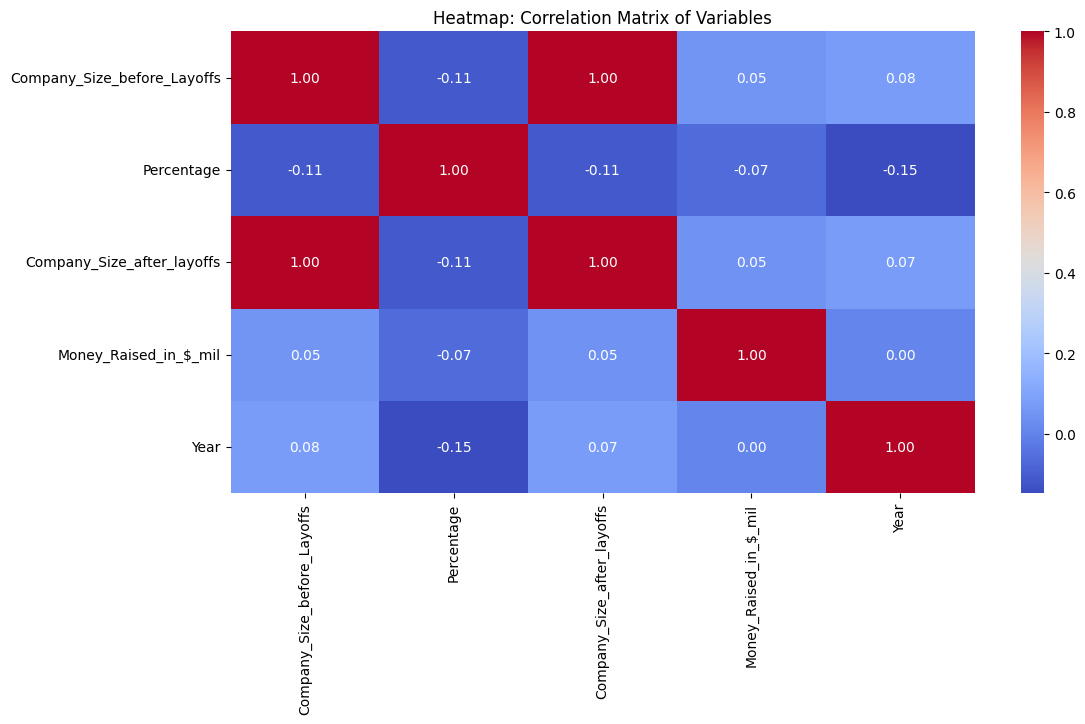

In [18]:
heatmap_data = df[['Company_Size_before_Layoffs', 'Percentage', 'Company_Size_after_layoffs', 'Money_Raised_in_$_mil', 'Year']]

# Create the correlation matrix
correlation_matrix = heatmap_data.corr()

# Create the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add labels and title
plt.title('Heatmap: Correlation Matrix of Variables')
# plt.xlabel('Variables')
# plt.ylabel('Variables')

# Show plot
plt.show()

According to this heat map, there is a weak negative correlation between company size before layoffs and the percentage of layoffs (r = -0.11). This suggests that the company size before layoffs has only a minor impact on the percentage of layoffs. It seems that the correlation coefficient is higher for the year and the percentages of layoffs. It will be interesting to see whether the effect size is higher (and statistically significant) for these two variables.

## Investigating time and year-dependent layoff rates

In order to understand layoff trends in this dataset, which spans over a few years, we need to visualize and test this data and their variables to test our hypothesis. By doing this, we can compare independent variables that may alter or cause fluctuations in layoff rates. We can begin by visualizing company sizes before and after layoffs, by year.

### Visualizing the data

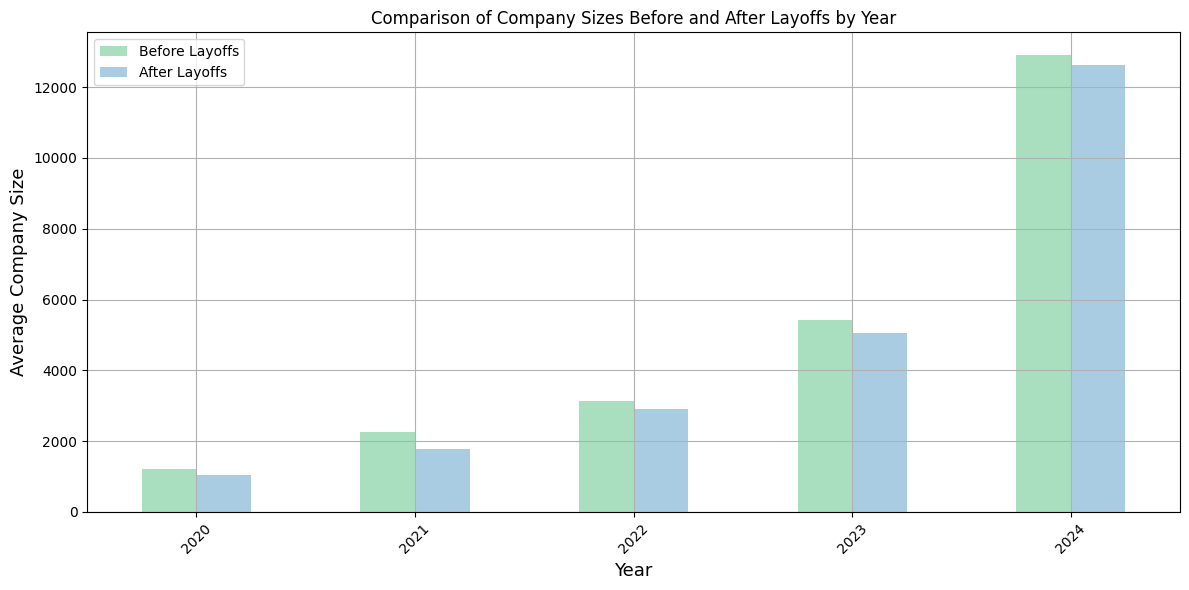

In [19]:
# company size before/after layoffs by industry
industry_sizes = time_series_df.groupby('Year').agg({
    'Company_Size_before_Layoffs': 'mean',
    'Company_Size_after_layoffs': 'mean'
})

#plot
industry_sizes.plot(kind = 'bar', figsize = (12, 6), color  = ['#A9DFBF', '#A9CCE3'])
plt.title('Comparison of Company Sizes Before and After Layoffs by Year')
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Average Company Size', fontsize = 13)
plt.xticks(rotation = 45)
plt.legend(['Before Layoffs', 'After Layoffs'])
plt.tight_layout()
plt.grid(True)

This graph illsutrates the average size of a company in a given year, relative to its size post-layoff. We can see that there is not an overwhelming difference in decrease in size, however 2021 shows an increased chasm between size before layoffs and after layoffs.

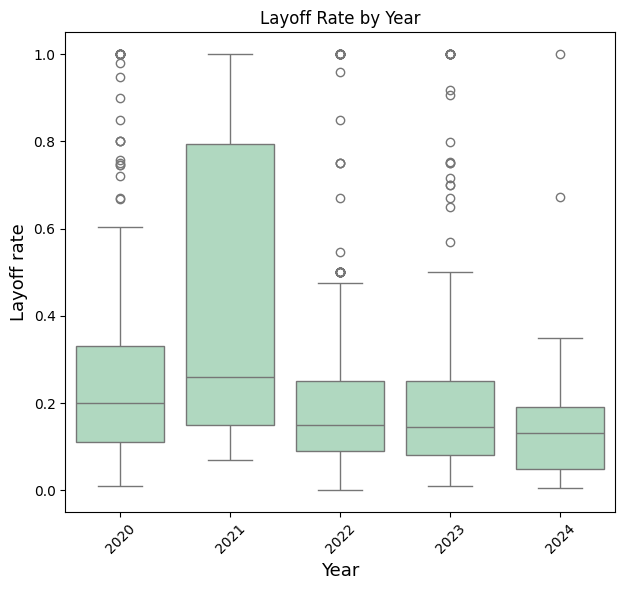

In [20]:
# layoff rate for each company
time_series_df['Layoff_Rate'] = time_series_df['Laid_Off'] / time_series_df['Company_Size_before_Layoffs']

######## plots
plt.figure(figsize=(12, 6))

# layoff rate
plt.subplot(1, 2, 1)
sns.boxplot(x='Year', y='Layoff_Rate', data=time_series_df, color = '#A9DFBF')
plt.title('Layoff Rate by Year')
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Layoff rate', fontsize = 13)
plt.xticks(rotation = 45)


plt.tight_layout()
plt.show()

As demonstrated in the plot, 2021 has the highest mean layoff rate, however, there is a much broader interquartile range, indicating a greater variance in layoff rates. This graphic illustrates 2021 with the greatest variability, which proceeds to decrease and stabilize into 2024. To attempt to understand this finding, we can facilitate statistical significance tests.

### t-test between layoffs 2020 vs 2021

A series of t-tests were performed on the total amount of laid-off employees by year. By doing this, we can attempt to reveal any potential anomalies that may have resulted in disproportionate layoffs, such as the COVID-19 pandemic and lockdown, and resultant recessions.

In [21]:
# t-test between lay offs 2020 v 2021

time_series_df = df.dropna(subset=['Year', 'Laid_Off'])

# extract
#group1 = df[df['Year'] == 2019]['Laid_Off']
group2 = time_series_df[time_series_df['Year'] == 2020]['Laid_Off']
group3 = time_series_df[time_series_df['Year'] == 2021]['Laid_Off']


# check groups not empty
if not group2.empty and not group3.empty:
    t_stat, p_val = stats.ttest_ind(group2, group3, nan_policy='omit')

    print(f"T-statistic: {t_stat}, P-value: {p_val}")
    
else:
    print("One or both groups are empty, cannot perform t-test.")


if p_val < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

T-statistic: -2.6871118862417926, P-value: 0.007556343317608741
There is a significant difference!


In [22]:
# t-test between lay offs 2021 v 2022

time_series_df = time_series_df.dropna(subset=['Year', 'Laid_Off'])

# extract
#group1 = df[df['Year'] == 2019]['Laid_Off']   // 2019 df = empty, omit
#group2 = df[df['Year'] == 2020]['Laid_Off']
group3 = time_series_df[time_series_df['Year'] == 2021]['Laid_Off']
group4 = time_series_df[time_series_df['Year'] == 2022]['Laid_Off']

# check groups not empty
if not group2.empty and not group3.empty:
    t_stat, p_val = stats.ttest_ind(group3, group4, nan_policy='omit')

    print(f"T-statistic: {t_stat}, P-value: {p_val}")
    
else:
    print("One or both groups are empty, cannot perform t-test.")



if p_val < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

T-statistic: 1.3521086863168745, P-value: 0.1768577262747666
There is NOT a significant difference!


In [23]:
# t-test between lay offs 2022 v 2023

time_series_df = time_series_df.dropna(subset=['Year', 'Laid_Off'])

# extract

group4 = time_series_df[time_series_df['Year'] == 2022]['Laid_Off']
group5 = time_series_df[time_series_df['Year'] == 2023]['Laid_Off']

# check groups not empty
if not group2.empty and not group3.empty:
    t_stat, p_val = stats.ttest_ind(group4, group5, nan_policy='omit')

    print(f"T-statistic: {t_stat}, P-value: {p_val}")
    
else:
    print("One or both groups are empty, cannot perform t-test.")

if p_val < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

T-statistic: -2.4465378567686895, P-value: 0.014586247429764637
There is NOT a significant difference!


 After conducting t-tests on each year, the only significance found was between the years 2020 and 2021, indicating that COVID-19 may have been a factor in the increased layoffs that year, as 2020 and 2021 were the years most heavily influenced by COVID-19.

### Time Series Analysis

To further visualize correlation between layoffs and year, let's run a time series analysis to model trends over time.

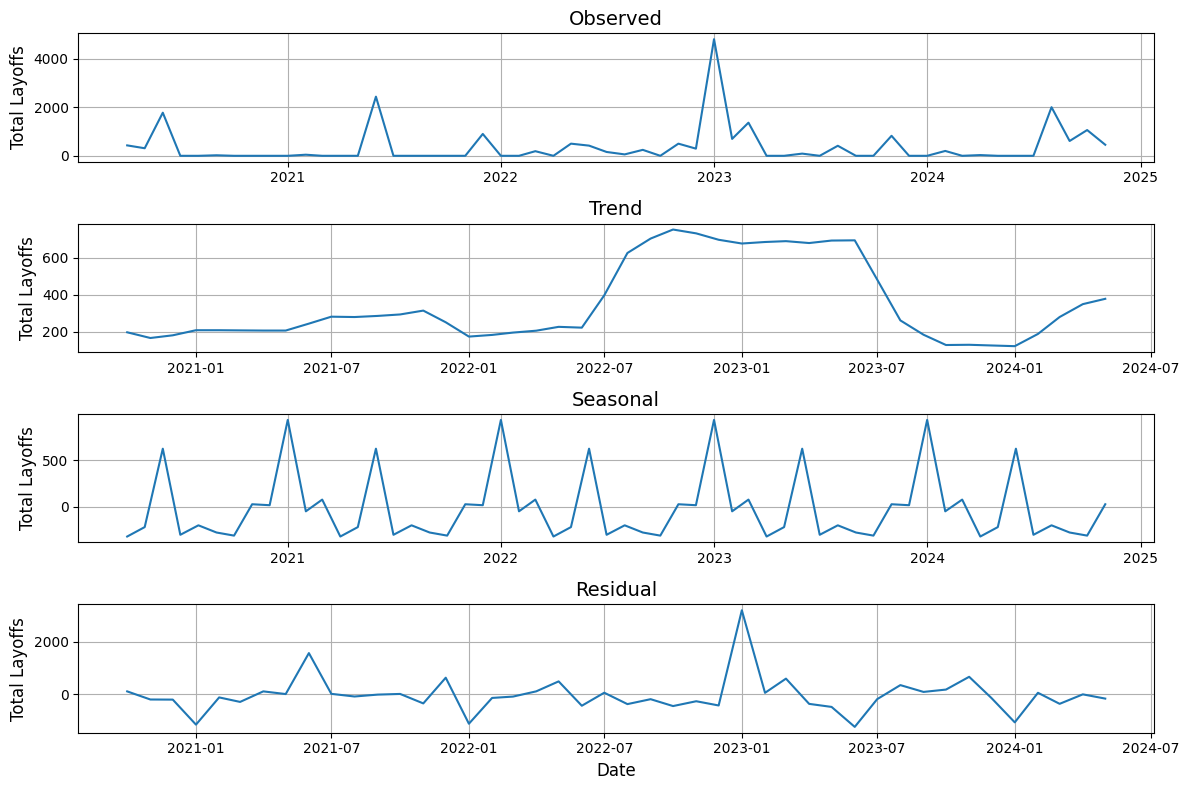

In [24]:
# convert datetime
time_series_df['Date_layoffs'] = pd.to_datetime(time_series_df['Date_layoffs'])
time_series_df.set_index('Date_layoffs', inplace=True)

# aggregate dates if duplicate, sum
time_series_df = time_series_df.groupby(time_series_df.index).sum()

# assign monthly frequency
time_series_df = time_series_df.asfreq('MS')

# check for missing dates, summing values
time_series_df = time_series_df.resample('MS').sum()

# seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(time_series_df['Laid_Off'], model='additive')

### begin plots ###
plt.figure(figsize=(12, 8))

# observed
plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.title('Observed', fontsize=14)
plt.ylabel('Total Layoffs', fontsize=12)
plt.grid(True)

# trend
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.title('Trend', fontsize=14)
plt.ylabel('Total Layoffs', fontsize=12)
plt.grid(True)

# seasonal
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.title('Seasonal', fontsize=14)
plt.ylabel('Total Layoffs', fontsize=12)
plt.grid(True)

# residual
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.title('Residual', fontsize=14)
plt.ylabel('Total Layoffs', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

This time series analysis models the observed data, while the trend line details the long-term progression/trend in layoffs. The trend line illustrates a significant increase in layoffs peaking around early 2023, where it then sharply decreases. The seasonal line shows an annual pattern, suggesting a seasonal effect on layoffs, such as an increase in layoffs during certain months of the year. The residual plot -- typically used for identifying anomalies and irregularities in data -- peaks at the start of 2023, indicating a possible unexpected event that caused layoff rates to deviate from their typical trends.

### ANOVA for layoffs across multiple years

With statistical significance in layoff rates between 2020 and 2021 proved, we can attempt to prove that layoff rates between years do not fluctuate by chance.

In [25]:
###### begin EDA
descriptive_stats = time_series_df.describe()

# layoff rate distribution by year
time_series_df['Layoff_Rate'] = time_series_df['Laid_Off'] / time_series_df['Company_Size_before_Layoffs']
layoff_rate_by_year = time_series_df.groupby('Year')['Layoff_Rate'].describe()

# ANOVA, if layoff rates by year differ
layoff_rates_by_year = [group['Layoff_Rate'].values for _, group in time_series_df.groupby('Year')]
anova_results = stats.f_oneway(*layoff_rates_by_year)

# output ANOVA
print("Descriptive Statistics:")
print(descriptive_stats)
print("\nLayoff Rate by Year:")
print(layoff_rate_by_year)
print("\nANOVA Test p-value:")
print(anova_results.pvalue)

Descriptive Statistics:
                #     Laid_Off  Percentage  Company_Size_before_Layoffs  \
count     56.0000    56.000000   56.000000                    56.000000   
mean    3278.8750   371.803571   34.997594                  6234.428571   
std     5923.8093   801.078306   52.658018                 25892.209310   
min        0.0000     0.000000    0.000000                     0.000000   
25%        0.0000     0.000000    0.000000                     0.000000   
50%        0.0000     0.000000    0.000000                     0.000000   
75%     3589.7500   421.500000   56.500000                  2519.500000   
max    34482.0000  4800.000000  213.000000                188450.000000   

       Company_Size_after_layoffs  Money_Raised_in_$_mil          Year  \
count                   56.000000              56.000000     56.000000   
mean                  5862.625000             566.794643   3033.214286   
std                  25612.197805            1069.508960   4626.122730   
min 

Since the calculated p-value is less than 0.001, the results are highly statistically significant, indicating that the variation in layoff rates across different years is not due to random chance. Let's continue to run tests to gain a deeper understanding on the relationships between these variables.

### OLS Regression

Let's run an OLS regression on the Year, Company_Size_before_Layoffs, and Layoff columns to see if we can identify the most relevant variable (column) to predict future layoff trends.

In [26]:
# regression analysis 
X = time_series_df[['Year', 'Company_Size_before_Layoffs']]
X = sm.add_constant(X) 
y = time_series_df['Laid_Off']

# regression model
model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:               Laid_Off   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     6.022
Date:                Sun, 10 Mar 2024   Prob (F-statistic):            0.00440
Time:                        23:35:20   Log-Likelihood:                -447.64
No. Observations:                  56   AIC:                             901.3
Df Residuals:                      53   BIC:                             907.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

The result produces an F-statistic whose correlating p-value proves that the overall model is statistically significant. The p-value for 'Company_Size_before_Layoffs' suggests it is an important factor in prediciting the number of layoffs, while 'Year' does not have a significant effect, according to this model. The large condition number suggests potential multicolinearity issues, such as predictors that might be correlated with each other.

These visualizations and significance tests are premises to the conclusion that company size may be a larger indicator of layoffs, compared to time. Let's move our analysis away from time and towards funding, which is a contributing factor to company size.

## Analyzing Correlations Between Money Raised and Layoffs

Sort data by funding stages, clean up columns. Scatterplot of Money Raised vs Employees Laid Off, log scale. Stages are also coloured and named in the legend for EDA purposes; also, non-linear stages (Acquired, Private Equity, Subsidiary, Unknown) are not shown.

At a glance we can see that the data is roughly a line from origin outwards, suggesting a positive correlation between the two variables. We can also see that in general, the higher up in money raised and layoffs, the higher the stage the company is likely to be.

It is important to note that companies that are post-ipo may have gone through any number of Series stages, for example a company could go Post-IPO after just a Series A funding stage while another may go Post-IPO after Series A-J.

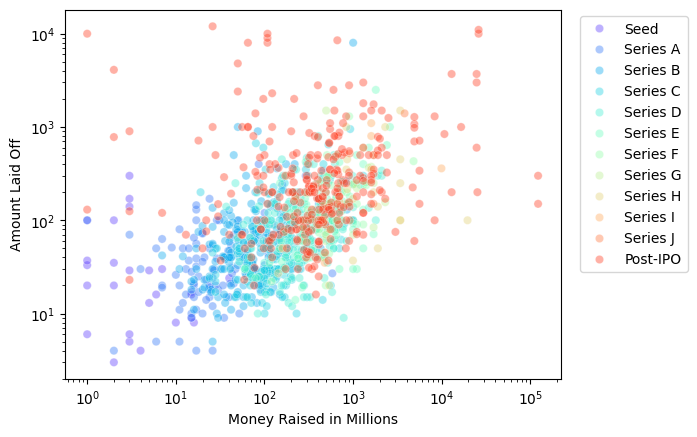

In [27]:
std_stages = ['Seed', 'Series A', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G', 'Series H', 'Series I', 'Series J', 'Post-IPO']
stages = ['Seed', 'Series A', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G', 'Series H', 'Series I', 'Series J', 'Post-IPO', 
'Acquired', 'Private Equity …', 'Subsidi…', 'Unknown']

df["Stage_i"] = df["Stage"].apply(lambda x: stages.index(x))
df = df.sort_values(by=["Stage_i"])

sns.scatterplot(x="Money_Raised_in_$_mil", y="Laid_Off", hue="Stage", data=df[df["Stage"].isin(std_stages)], alpha=0.4, palette='rainbow')
plt.xlabel('Money Raised in Millions')
plt.ylabel('Amount Laid Off')
plt.legend(loc='upper right', bbox_to_anchor=(1.27, 1))
plt.xscale("log")
plt.yscale("log")

Note that the majority of companies have funding within the 10^2-10^3 million range. 

As shown in the scatterplot above, we can usually assume that the further series the company is, the more total funding they have raised. Note that Post-IPO companies have around the same median money raised as those in Series E,F funding -- this may suggest that the majority of companies go public before hitting those series of funding. I've removed outliers / fliers for the benefit of the viewer.

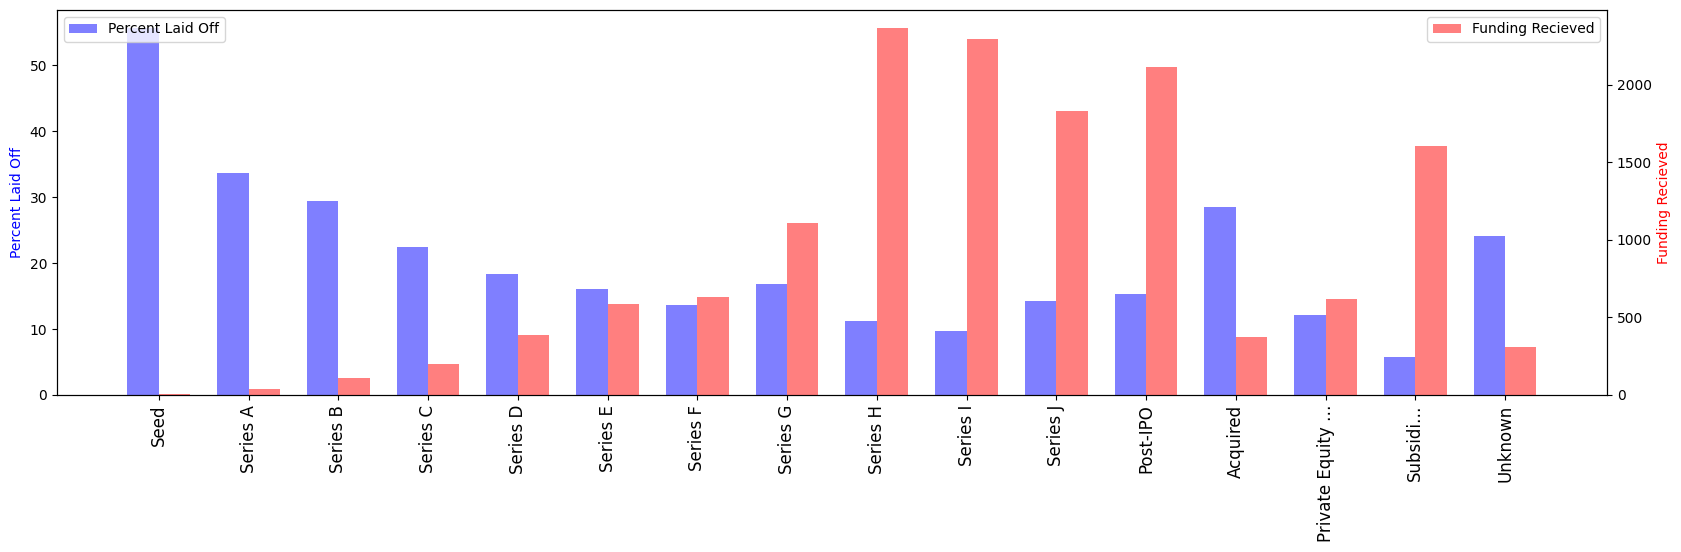

In [28]:
stages=df['Stage'].unique()
list_stages_df = []
for i in stages:
    x = df[df.get('Stage') == i]
    list_stages_df.append(x)
mean_stages_df = []
for i in list_stages_df:
    y = i.get('Percentage').mean()
    mean_stages_df.append(y)
mean_funding_df = []
for i in list_stages_df:
    y = i.get('Funding').mean()
    mean_funding_df.append(y)
# plt.bar(stages, mean_funding_df)
bar_width = 0.35
x = np.arange(len(stages))
fig, ax1 = plt.subplots(figsize = (20,5))
bars1 = ax1.bar(x - bar_width/2, mean_stages_df, bar_width, color='blue', alpha=0.5, label='Percent Laid Off')
ax2 = ax1.twinx()
bars2 = ax2.bar(x + bar_width/2, mean_funding_df, bar_width, color='red', alpha=0.5, label='Funding Recieved')
ax1.set_ylabel('Percent Laid Off', color='blue')
ax2.set_ylabel('Funding Recieved', color='red')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_xticks(x, stages, rotation=90, fontsize=12)
plt.show()

From this double bar graph, we can see that there is an inverse relation between funding and percent laid off. The lower the amount of funds a company recieves, the more the chances of layoff. This is also supported by the scatter plot proving that there is a negative correlation between the two.

In [29]:
outcome, predictors = patsy.dmatrices('Percentage ~ Funding', df)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Percentage   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     6.264
Date:                Sun, 10 Mar 2024   Prob (F-statistic):             0.0124
Time:                        23:35:22   Log-Likelihood:                -6302.5
No. Observations:                1418   AIC:                         1.261e+04
Df Residuals:                    1416   BIC:                         1.262e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.1073      0.554     39.918      0.0

Relationship of stage vs laid off.  I've removed outliers / fliers for the benefit of the viewer.

We can see that while there is a positve correlation between stage and the number of employees laid off, when we look at it considering the percentage of employees, the amount is much lower.

We can see that a company in the seed stage is in general more likely to lose a much higher percentage of its employees when conducting a layoff, and perhaps more likely to shut down totally.

Conclusion: the more developed a company is, the less likely it is for you to get fired when a layoff does happen (though more people are fired at a time).

Lets look in to funding stage and see if we can find a similar correlation between that and percentage laid off.

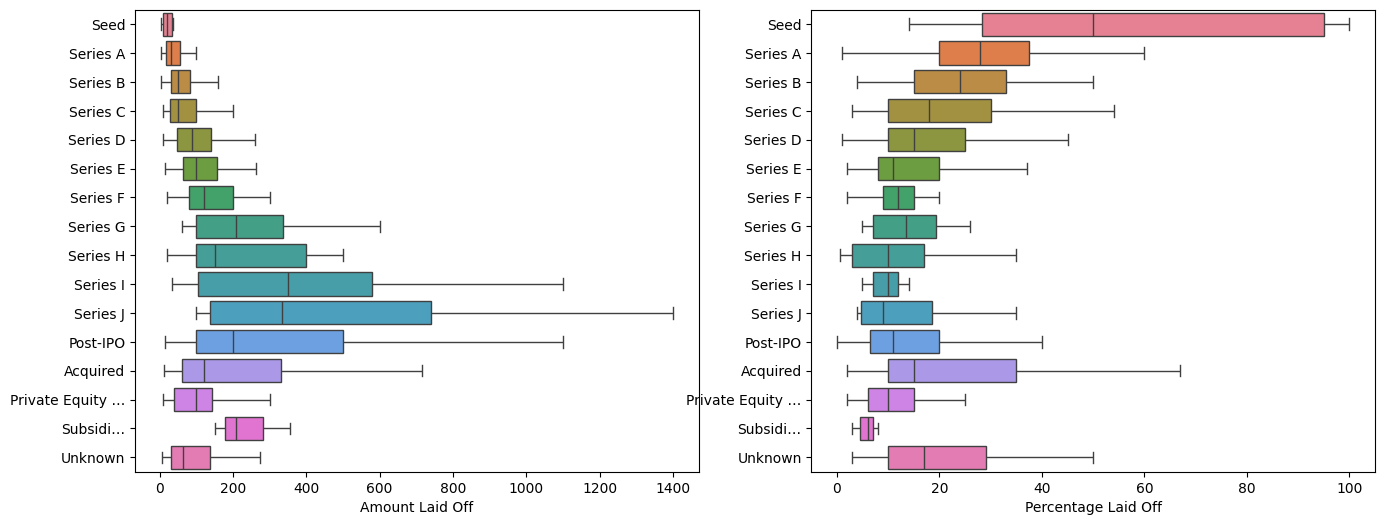

In [30]:
f, axs = plt.subplots(1,2, figsize=(16, 6))
sns.boxplot(y="Stage", x="Laid_Off", data=df, showfliers=False, ax = axs[0], hue="Stage")
axs[0].set_xlabel("Amount Laid Off")
sns.boxplot(y="Stage", x="Percentage", data=df, showfliers=False, ax = axs[1], hue="Stage")
axs[1].set_xlabel("Percentage Laid Off")
axs[0].set_ylabel("")
axs[1].set_ylabel("")
plt.show()

The `Stage` column of the data can be treated partially as ordinal data. This is because they have funding stages A-J, which represent how many rounds of funding the company has gone through. We can convert this into an integer based column, such that we can perform regression on it. Additionally, we can include the value `seed`, as it represents the company with 0 rounds of funding. Once they are converted, we will use linear regression to determine if the funding stage correlates with the percentage of employees laid off. This will help us conclude if `Series` is correlated, and therefore able to predict, if a company is more likely to perform layoffs. 

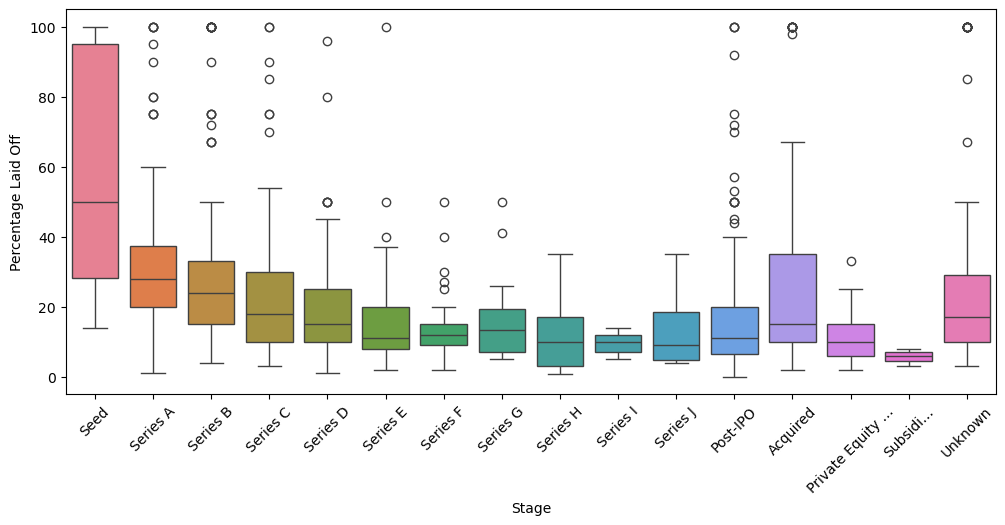

In [94]:
fig = plt.figure(figsize=(12, 5))
sns.boxplot(x='Stage', y='Percentage', data=df, hue='Stage')
plt.xticks(df['Stage'].unique(), rotation=45)
plt.ylabel('Percentage Laid Off')
plt.show()

/var/folders/mt/kt4lp3rx2p37sfswrnyhlkjr0000gn/T/ipykernel_25538/1788441162.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clear_funding.loc[:, 'Stage_numerized'] = clear_funding['Stage'].apply(lambda i: numerizer[i])


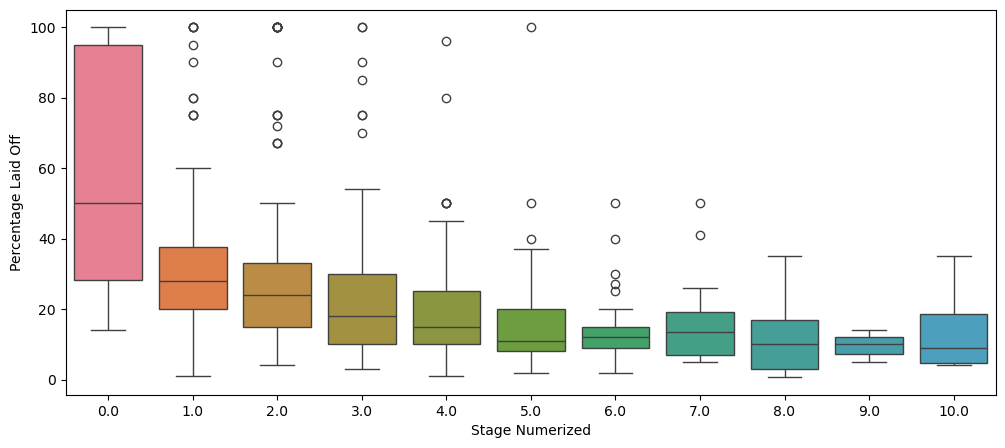

In [95]:
series = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
stage_numerizer = dict(zip([f'Series {s}' for s in series], np.arange(1, len(series)+1, 1)))
stage_numerizer['Seed'] = 0
numerizer = defaultdict(lambda : np.nan)
numerizer.update(stage_numerizer)
clear_funding = df[['Percentage', 'Funding', 'Stage']]
clear_funding.loc[:, 'Stage_numerized'] = clear_funding['Stage'].apply(lambda i: numerizer[i])

fig = plt.figure(figsize=(12, 5))
sns.boxplot(x='Stage_numerized', y='Percentage', data=clear_funding, hue='Stage')
plt.xlabel('Stage Numerized')
plt.ylabel('Percentage Laid Off')
plt.legend().remove()
plt.show()

In [110]:
outcome, predictors = patsy.dmatrices('Percentage ~ Stage_numerized', clear_funding)
model = sm.OLS(outcome, predictors)
results = model.fit()
results.pvalues[1]
results.tvalues[1]
results.params[0], results.params[1]

(37.2292611029432, -4.058332615279141)

With a measured p-value of 0.000, this means we are able to disprove the null hypothesis, resulting in the conclusion that there is a statistically significant correlation between the funding stage of a company and the percentage of employees laid off. With a negative correlation coefficient, it also results in the conclsuion that a company that has had more funding rounds is less likely to layoff a higher percentage of their employees. This is likely due to the fact that as you recieve more funding, your employee count rises. This means that a similarly sized layoff, when compared to a smaller company, will actually have a lower percentage. It also allows us to conclude that your job is more safe at a larger company, since they are less likely to layoff a large portion of their employees. 

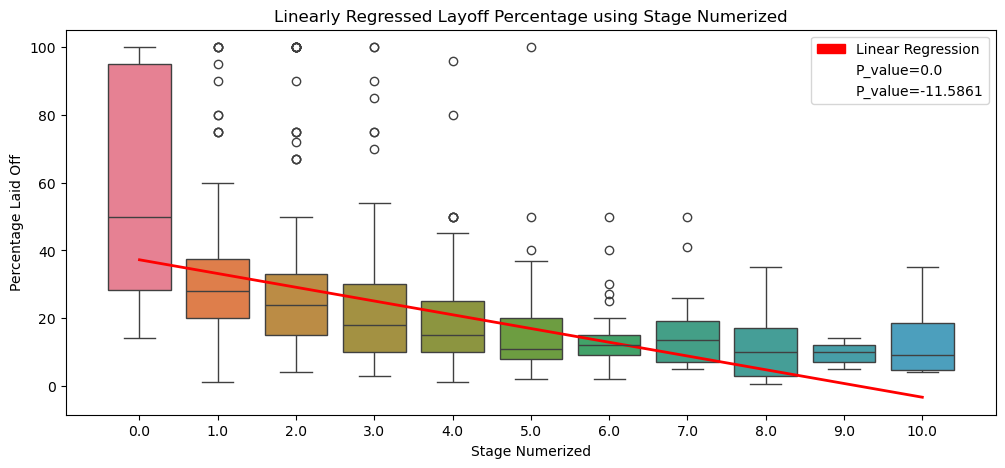

In [114]:
outcome, predictors = patsy.dmatrices('Percentage ~ Stage_numerized', clear_funding)
model = sm.OLS(outcome, predictors)
results = model.fit()
p_value = results.pvalues[1]
t_value = results.tvalues[1]
stages = np.sort(clear_funding['Stage_numerized'].unique())

fig = plt.figure(figsize=(12, 5))
sns.boxplot(x='Stage_numerized', y='Percentage', data=clear_funding, hue='Stage')

predicted_percentage = results.params[0] + results.params[1] * stages
sns.lineplot(x=stages, y=predicted_percentage, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Stage Numerized')
plt.ylabel('Percentage Laid Off')
plt.legend(loc='upper right', handles=[
    mpatches.Patch(color='red', label='Linear Regression'),
    mpatches.Patch(color='none', label=f'P_value={np.round(p_value, 4)}'),
    mpatches.Patch(color='none', label=f'P_value={np.round(t_value, 4)}'),
])
plt.title('Linearly Regressed Layoff Percentage using Stage Numerized')
plt.show()

Linear regression of money raised in mil vs employees laid off. We can see a statistically significant correlation: p = 0.000. With a positive slope, this means that as a company raises more money, it also increases the amount of employees being laid off.

In [34]:
df["Money_Raised_in_mil"] = df["Money_Raised_in_$_mil"]
outcome, predictors = patsy.dmatrices("Laid_Off ~ Money_Raised_in_mil", df)
mod = sm.OLS(outcome, predictors)  
res_log = mod.fit()
print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:               Laid_Off   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     25.59
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           4.77e-07
Time:                        23:35:23   Log-Likelihood:                -11609.
No. Observations:                1418   AIC:                         2.322e+04
Df Residuals:                    1416   BIC:                         2.323e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             249.8504    

## Correlations Between Funding and Layoffs


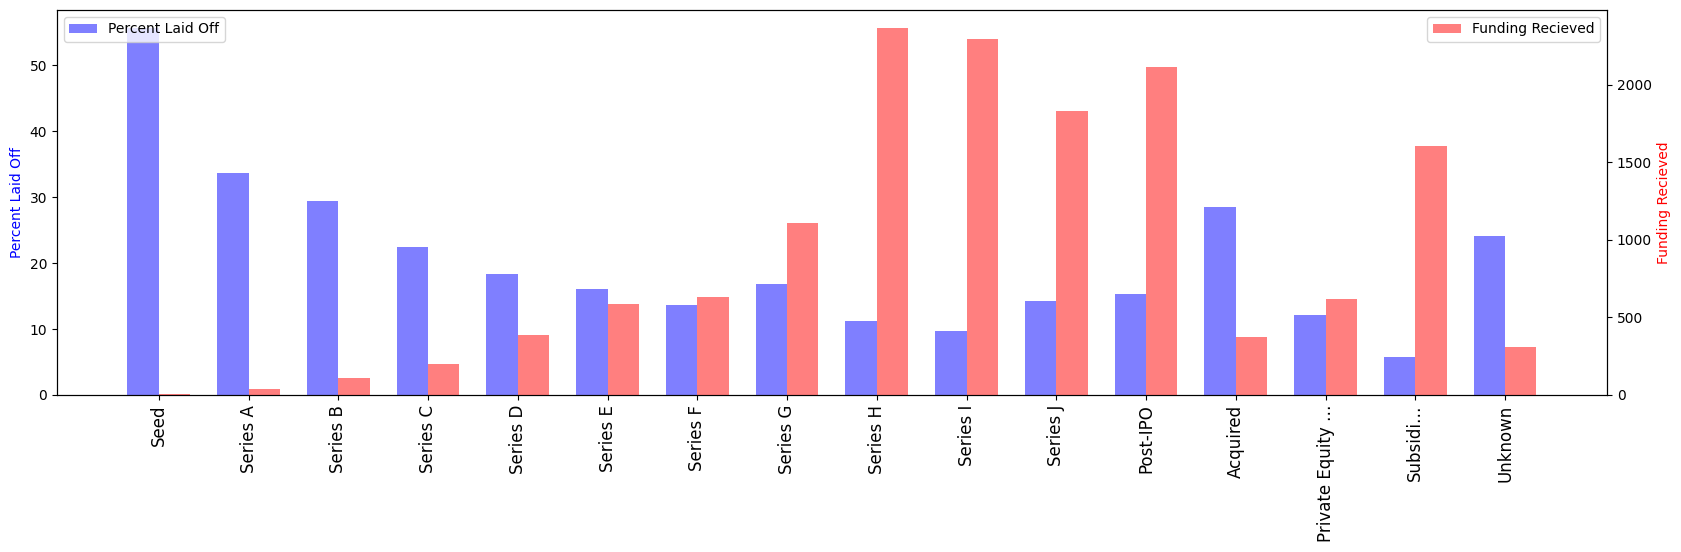

In [35]:
stages=df['Stage'].unique()
list_stages_df = []
for i in stages:
    x = df[df.get('Stage') == i]
    list_stages_df.append(x)
mean_stages_df = []
for i in list_stages_df:
    y = i.get('Percentage').mean()
    mean_stages_df.append(y)
mean_funding_df = []
for i in list_stages_df:
    y = i.get('Funding').mean()
    mean_funding_df.append(y)
# plt.bar(stages, mean_funding_df)
bar_width = 0.35
x = np.arange(len(stages))
fig, ax1 = plt.subplots(figsize = (20,5))
bars1 = ax1.bar(x - bar_width/2, mean_stages_df, bar_width, color='blue', alpha=0.5, label='Percent Laid Off')
ax2 = ax1.twinx()
bars2 = ax2.bar(x + bar_width/2, mean_funding_df, bar_width, color='red', alpha=0.5, label='Funding Recieved')
ax1.set_ylabel('Percent Laid Off', color='blue')
ax2.set_ylabel('Funding Recieved', color='red')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_xticks(x, stages, rotation=90, fontsize=12)
plt.show()

From this double bar graph, we can see that there is an inverse relation between funding and percent laid off. The lower the amount of funds a company recieves, the more the chances of layoff. This is also supported by the scatter plot proving that there is a negative correlation between the two.

In [36]:
outcome, predictors = patsy.dmatrices('Percentage ~ Funding', df)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Percentage   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     6.264
Date:                Sun, 10 Mar 2024   Prob (F-statistic):             0.0124
Time:                        23:35:24   Log-Likelihood:                -6302.5
No. Observations:                1418   AIC:                         1.261e+04
Df Residuals:                    1416   BIC:                         1.262e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.1073      0.554     39.918      0.0

From this OLS Regression Results table, we see that there is a small P value, which means we there is strong evidence against the null hypothesis. The condition number being large indicates that there might be other factors inlfuencing this relationship. Since majority of the data is from 2020 and on, other factors such as COVID, and etc. could have had an effect on the percent laid off. 

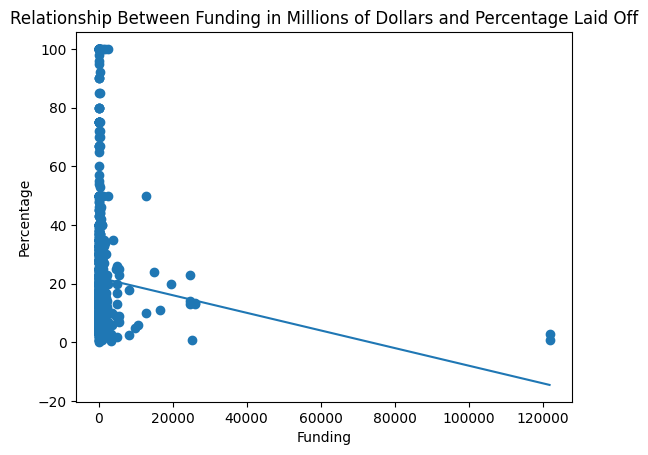

In [37]:
plt.scatter(df['Funding'], df['Percentage'])
plt.xlabel('Funding')
plt.ylabel('Percentage')
plt.title('Relationship Between Funding in Millions of Dollars and Percentage Laid Off')
linearx = np.arange(df['Funding'].min(), df['Funding'].max())
lineary = linearx * -0.0003 + 22.1073
plt.plot(linearx, lineary)
plt.show()

From this scatter plot, we can see that there is a strong relationship between the funding a company recieves and the percentage of their staff they layoff. With a majoirty of that data on the left side of the graph, the line of best fit looks almot vertical. It also shows that a majoirty of our data is from companies that receive below 40,000,000,000 in funding. We have two outliers on the far right.

In [38]:
no_outliers = df[df.get('Funding') < 120000]
outcome, predictors = patsy.dmatrices('Percentage ~ Funding', no_outliers)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Percentage   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     9.644
Date:                Sun, 10 Mar 2024   Prob (F-statistic):            0.00194
Time:                        23:35:24   Log-Likelihood:                -6292.0
No. Observations:                1416   AIC:                         1.259e+04
Df Residuals:                    1414   BIC:                         1.260e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.4162      0.569     39.368      0.0

After removing the two outliers, there was not that much change. Removing the two outliers still gives us reason to reject the null hypothesis since the P value is still small. 

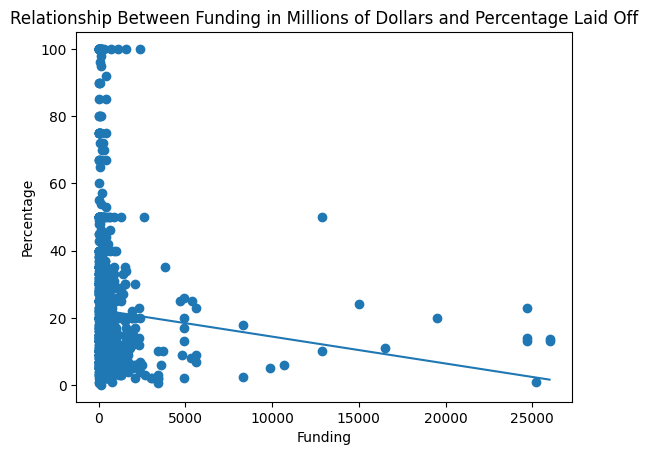

In [39]:
plt.scatter(no_outliers['Funding'], no_outliers['Percentage'])
plt.xlabel('Funding')
plt.ylabel('Percentage')
plt.title('Relationship Between Funding in Millions of Dollars and Percentage Laid Off')
linearx = np.arange(no_outliers['Funding'].min(), no_outliers['Funding'].max())
lineary = linearx * -0.0008 + 22.4162
plt.plot(linearx, lineary)
plt.show()

After removing the two outliers we have plotted the regression line and did some statistical analysis. We see that the slope of the regression line is negative showing us that there is an inverse relation between the two. Our P value for the data without the outliers is very small indicating that there is a relationship between the two. 

# Ethics & Privacy

##### Potential ethical concerns and how we plan to address them: 
Our dataset is webscraped from Layoffs.fyi, which contains explicit personal information on individuals who were laid off. Without explicit documentation of informed consent, for the sake of privacy conservation, we will be omitting this information and focusing on the metadata (corporations over the individual). Additionally, Layoffs.fyi only pulls data from news articles, so it is a biased sample that is pulled from data that is only accessible to the public. This dataset is primarily constructed by data contained to the USA, which effectively neglects layoffs that occur in other regions of the world, leading to potentially biased analysis and results. As a result of unsatisfactory observations from foreign countries, we will be orienting our data analysis in the context of the USA's economy. However, we will still include models and representations of non-US observations to provide scope and a point of reference to our data. The timeframe of our data is 2020-2024, which unfortunately excludes a larger historical context regarding layoffs, compounding potential bias and lack of scope. Due to this, our analysis will be further oriented towards a COVID and post-COVID economy. Before performing data analysis, we used a bootstrap p-test to confirm the data was not biased in terms of funding on the basis of geographic location. Despite having a significantly large portion of our data be from the California Bay Area, there is no statistically significant difference in the percentage of employees laid off.

# Team Expectations 

We expect our team members to be reliable in terms of completing one’s own work/contributions. They should maintain open communication between team members and are expected to communicate any scheduling conflicts for team meetings. They are still expected to complete their work before the meeting even if they are not able to make it. During team meetings, we expect all members to be actively contributing to discussion, and to be professional when discussing conflicts between ideas. Each member will be assigned tasks by the end of the team meeting, and they are expected to arrive to the next team meeting with their task completed sufficiently, and uploaded to the repository, such that we are able to discuss progress and any issues we ran into.

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 02/04 | 1 PM | Read previous COGS 108 Final Projects | Complete previous quarters’ COGS 108 Final Project Analysis, plan meeting times, begin discussing project topics. | 
| 02/05  | 1 PM | Brainstorm project topics, potential data sources, and viability of research questions | Discuss and decide on final project topic; discuss hypothesis; begin background research Discuss ideal dataset(s) and ethics; draft project proposal| 
| 02/11  | 1 PM | Edit, finalize, and submit proposal; Search for datasets | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part |
| 02/18  | 1 PM  | Delegate Tasks and start wrangling | Go over what everyone has done. Make edits or revise things before. Also go over revisions and feedback from the proposal. |
| 02/25  | 1 PM  | Finalize wrangling/EDA; Begin Analysis | Meet for Checkpoint #1 |
| 03/03  | 1 PM  | Discuss final approaches for Data Viz and EDA; Continue Analysis | Meet for Checkpoint #2 |
| 03/06  | 7:30 PM  | Finalize Data Viz and EDA; Begin Analysis | Meet for Checkpoint #2 |
| 03/10  | 1 PM  | Finalize quantitative analysis; Discuss approach to final video submission | Meet for video and final submission semantics |
| 03/13 | 12 PM  | Complete analysis; Draft results/conclusion/discussion | Discuss/edit full project |
| 03/20  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |